# Audio Processing

In this guided notebook you will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates. Then we go on with the audio data analysis and extracting necessary features from a sound/audio file.  
  
**Bonus**  building an classifier for the music genre classification. 

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
Python has a few libraries for audio processin, such as Librosa and PyAudio. Fele free to use them. Librosa has more option for music related task, and it's well [documented](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html).

</details>

In [77]:
##TODO - I have added a few useful libraries here as a strater, add the other later to the end of this cell
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import diapason
import soundfile as sf
import librosa
import librosa.display
from scipy.io import wavfile
from IPython.display import Audio
from scipy.fft import fft, fftfreq


from keras.models import Model
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D, AveragePooling2D
from keras.layers.convolutional import SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import SpatialDropout2D, Dropout
from keras.regularizers import l1_l2
from keras.layers import Input, Flatten
from keras.layers import DepthwiseConv2D
from tensorflow.keras.constraints import max_norm

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

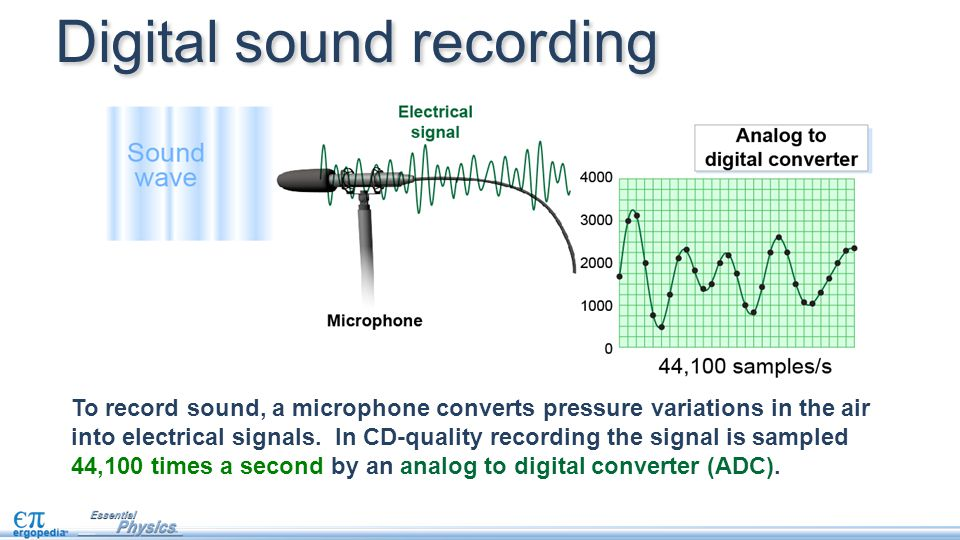

In [78]:
#R = 44100 # Sampling rate
#D = 5     # Duration of the sound
#dt = 1/R

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants). Then plot the function.

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [96]:
###----------------Explanation----------------######################################

#this function generates a sinsuoid wave of differernt frequency for a fixed duration of (5 seconds) and  with fixed sampling frequency
# of 44100 Hz


def note(f):
    
    ####-------------Function parameters---------------------############################################

    # input arguments:  f: this the frrequency of sin waveform you want to generate
    # output arguments: x: timestamps 
    #                    y: sine waveform of the given frequency 

    # limitation of this function: this function can not create a sine waveform of diffenrent amplitude (it is fixed to 1),
    #with different sampling frequency (it is fixed to 44100) and the duration is also fixed to 5 seconds.  
    #----------------------------------------------------------------------------------------------------

    R = 44100 # Sampling frequency
    D = 5     # Duration of the sound
    num_samples = D*R # total samples in R duration
    A = 1 # amplitude
    x = np.linspace(0,D,num_samples)
    y = A * np.sin(2 * np.pi * f * x )
    
    plt.plot(x,y)
    plt.title('Sine waveform  of %d Hz' %f)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
    
    #wav = diapason.core.generate_wav(f, D, R) # it can be used 
    
    return x,y




❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

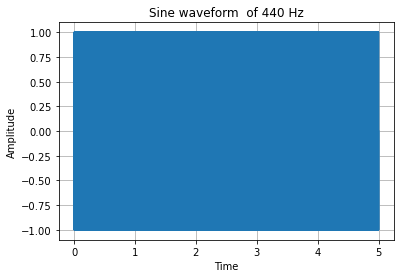

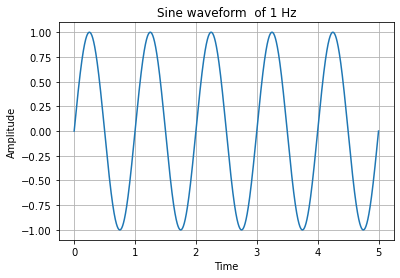

In [80]:
#TODO - plotting
x_440,y_440 = note(440)
x_1,y_1 = note(1)

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason, then play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

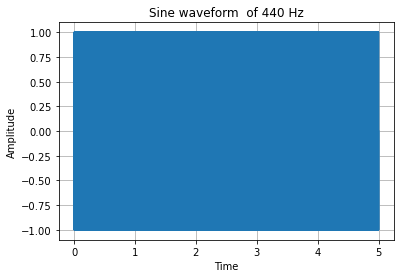

In [81]:
#Aduio play

x_440,y_440 = note(440) # note function generating a sine waveform of 440 hz and digitizing this waveform at 44100 sampling rate.
Audio(y_440,rate=R)

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

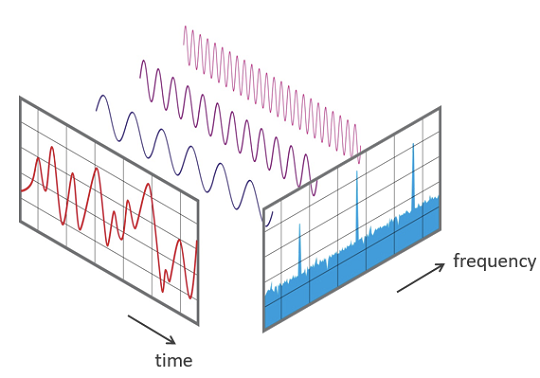

Let's use [`scipy`](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) to analyze the signals we built above.

Wrie a `plot_fft` function that recieves 3 inputs: `signal`, `sampling-rate`, and `max-frequency`. And plot the `fft` of your constructed signal.

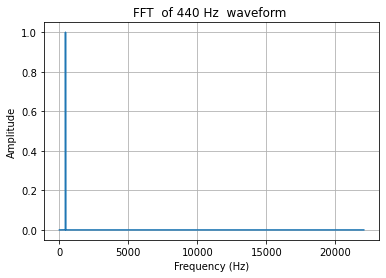

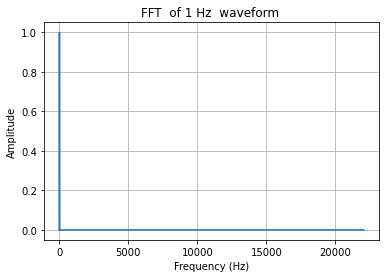

In [82]:
#TODO - plot_fft funciton
####################---------Explanation---------------------------------------############################
#this function  takes a time-domain signal as input and tranform this signal into frquency domain 
#by applying fast fourier transform.  FFT provides us with all the frequecies that are present in the time-domain signal.

# Example 1: x_440,y_440 = note(440)
# This function produce sine wave with 440 Hz, the fft is suppose to show a peak at 440 Hz

# Exmaple 2: Now lets say we have signal: y_new= y_440 + y_1
# then we will have two peaks(bumps) in the frquency domain, one at 1 Hz and the second at 440 Hz

 


def plot_fft(signal,R,max_f):
    
    ##########------------------Function parammeters------------------------------##################################

    #input paramters: singal 

    # signal:  it is a time domain signal (1-dimesional array)
    # R : samplin rate or sampling frqeuency in Hz
    # max_f: according to Nyquist criteria, the frquency of the input signal should be atleast half than the sampling rate, only then 
    # this signal can be fully reconstructed. However, we always try to make sure that samplin rate is much higher than original signal
    # to get better reconstruction results.

    # output arguments: this function just plot the FFT of the time domain signal 
        
        N = len(signal) 
        T = 1.0 / R

        # frequency spectrum of the signal
        yf = fft(signal)
        

        xf = fftfreq(N, T)[:N//2] # for better visualization plotting just positive side
        plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])) #
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.show()


        max_f = R//2 # nyquist frequency or nyquist criteria

        
        
#########################################################################################        
#######-----------------Plotting the sine waveforms that are produced in above cells.
#########################################################################################
# plotting fft of 440Hz signal

plt.title('FFT  of %d Hz  waveform ' %440)
plot_fft(y_440,R,max_f)

# plotting fft of 1Hz signal


plt.title('FFT  of %d Hz  waveform ' %1)
# plotting fft of 1Hz signal
plot_fft(y_1,R,max_f)

## Real-life samples

Now perform `fft` on the `.wav` files in the task folder:

sampling rate of this file is 44100


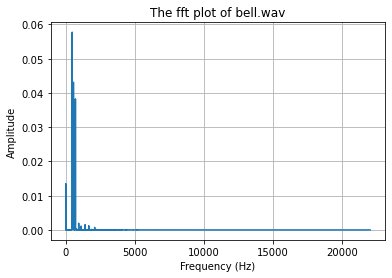

sampling rate of this file is 48000


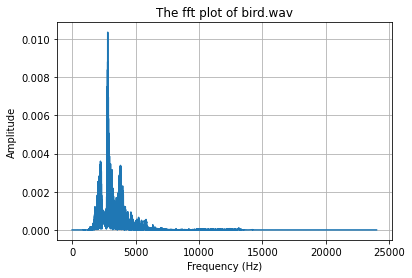

sampling rate of this file is 44100


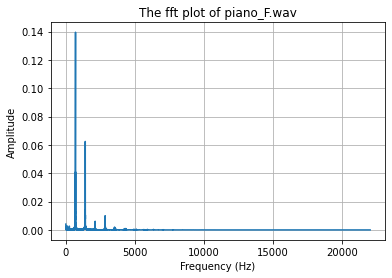

sampling rate of this file is 44100


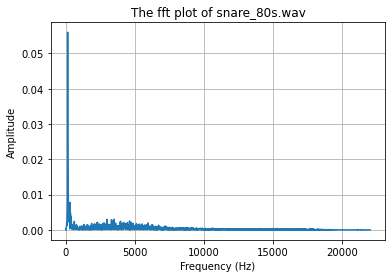

In [86]:

# please provide the base path, where all the audio file are present.
base_path = 'C:/Users/muhammad.saif/Desktop/Interview_tasks-main/AudioTaskFinal/'


files_list = os.listdir(base_path)

# This part selects all the wave files of a base directory and plot the FFT. 
for wave_file in files_list:
    if (wave_file.endswith(".wav")):
        file = base_path + wave_file 
        #print(file)
        data,sr = librosa.load(file, sr=None)
        print('sampling rate of this file is {}'.format(sr)) # print the sampling rate of each wave file
        max_f = sr//2
        plt.title('The fft plot of ' + wave_file)
        plot_fft(data,sr,max_f) # plot the FFT
        



Next, load the audio of `bird.wav`(it should has a `shape` of <129279, 2> ) and visualize the sound **waveform**

C:/Users/muhammad.saif/Desktop/Interview_tasks-main/AudioTaskFinal/bird.wav
(129279,)


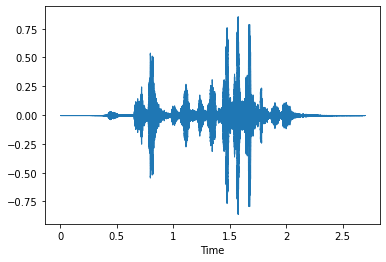

In [87]:
#TODO - load bird.wav
#################################################
######################Bird waveforms############################
########################################################

bird_file = base_path + 'bird.wav'   
print(bird_file)
bird_data,bird_sr = librosa.load(bird_file, sr=None)
#### printing the shape of birds.wav 
print(bird_data.shape)

#######visulaize the waveform using librosa
librosa.display.waveshow(bird_data,sr=bird_sr)


Let's apply and plot the FFT of that signal & play it

In [88]:
#TODO - dispaly and play the audio

##### We have computed and plot the FFTs of all the wave files in the above cell [86]. please check it from there. 
# The time domain representation of the signl is  plotted in the cell [87]. 

Audio(bird_data,rate=bird_sr) # play the audo file
#librosa.display.waveshow(bird_data,sr=bird_sr) # to plot the raw waveform please uncomment it

---
## Audio processing with librosa
Awesome! 

❓ After this intro, let's dig more into the audio processing.
As the next step, try to load one the `wav` files with librosa. Te output should be an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [89]:

bird_data,bird_sr = librosa.load(bird_file) # loading the bird wav file
####### 
print(bird_sr) # printing the default sampling rate 
bird_data.shape # number of samples of the bird wave

22050


(59388,)

❓ Try to change the sampling rate to 44.1KHz. you may try to play the audio! 

In [90]:
#resampling the data of the bird wave to 44.1
# bird_sr: is the original sampling rate of bird wav
# bird_data: bird data
bird_data_resample = librosa.resample(bird_data, orig_sr=bird_sr, target_sr=44100)
bird_data_resample.shape

(118776,)

Instead of using `plot_fft`, use `librosa` modules to display the wav file. 

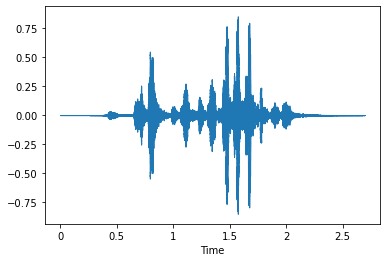

In [91]:
# displying the bird.wav file using librosa module
librosa.display.waveshow(bird_data,sr=bird_sr)

**Spectrogram**  

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Using librosa dispaly the spectrogram of audio signal you loaded in the previous step. 

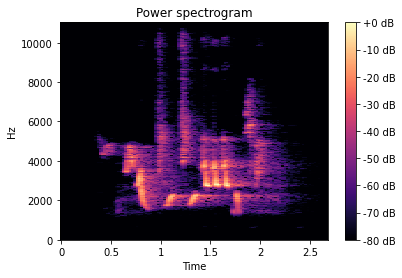

In [97]:

# plotting the spectogram:
##################################################################################
#####----------------Explanation-------------------------------------------------------
############################################################################

# Why do we need spectogram?
# fft gives us the frquencies that are present in the signal. However, it do not provide the temporal information about the existng frequencies.
#(at which particular time the frquency is present). short-time fourier transform (STFT) is the improved version of FFT, 
# which takes the FFT on small snipet and spectograms are the visualizations of STFT.

# The probem with stft is that it used fix size window and as a result offer a trdeoff of time-frequency resolution. I with one 
# of my collegues, we developed an algorithm called anchored-stft, which defines multiple windows of differrent size and 
# optimize time-frqequency resolution tradeoff. our paper is available: https://www.nature.com/articles/s41598-022-07992-w

fig, ax = plt.subplots()
stft_bird = librosa.stft(bird_data) #apply stft for ploting spectograms
img = librosa.display.specshow(librosa.amplitude_to_db(stft_bird,ref=np.max),
                               y_axis='hz', x_axis='time',ax=ax) # spectogrom

ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB") # enables color bar

❓ Now similar to the begining of this task, create an audio signalwith `sr` of 22.05 KHz for the duration of 5`s` using `librosa`, and save the file as `sample_audio_220.wav`. 


In [95]:
####------ genearting a sound file and then write the generated sound file.
save_path = base_path + 'sample_audio_220.wav'

f = 440 # similar to the bigining if the task, I used the frequency of the signal as 440Hz
sr = 22050
duration = 5
length = duration*sr
signal_gen = librosa.tone(f, sr=sr, length=length)
print(signal_gen.shape)

sf.write(save_path, signal_gen, sr) # since librosa.output.write_wav is deprecated and is not supported anymore, I have used soundfile module to save the generated signal


(110250,)


## Feature Extraction

❓  What are the spectral features and name a few:

In [16]:
# Spectral features, as the name suggests, are obtained by transforming the time-domain signal into frequency domain by using fft
# or any other transformation.
# Some of the spectral features for audio are:
# 1) Fundamental frequency (main frequency component)
# 2) Frequency components
# 3) Spectral density
# 4) Perceptive Linear Prediction (PLP) features 
# 5) Spectral bandwidth
# 6) Mel-frequency capstral coefficients (MFCCs)

Spectral features, as the name suggests, are obtained by transforming the time-domain signal into frequency domain by using fft
# or any other transformation.
# Some of the spectral features for audio are:
# 1) Fundamental frequency (main frequency component)
# 2) Frequency components
# 3) Spectral density
# 4) Perceptive Linear Prediction (PLP) features 
# 5) Spectral bandwidth
# 6) Mel-frequency capstral coefficients (MFCCs)

<details>
    <summary>💡 <strong>hint!</strong></summary>
Spectral bandwidth, Spectral centriod, Spectral rolloff, zero-crossing rate, Mel-frequency capstral coefficients (MFCCs), and chroma 
</details>

#### Spectral bandwith

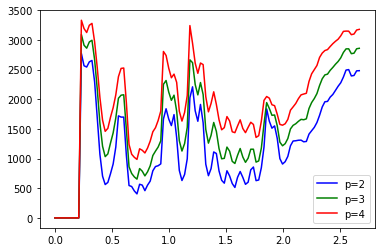

In [17]:

########-------------------------------------------------------------------------------------------------
###### Feature extraction by extracting spectral bandwidth----------------------------------------------
#########-----------------------------------------------------------------------------------------------

# extracting spectral bandwidth features of order 2,3 and 4
spec_bw_2 = librosa.feature.spectral_bandwidth(y=bird_data, sr=bird_sr)[0]
spec_bw_3 = librosa.feature.spectral_bandwidth(y=bird_data, sr=bird_sr, p=3)[0]
spec_bw_4 = librosa.feature.spectral_bandwidth(y=bird_data, sr=bird_sr, p=4)[0]

times = librosa.times_like(spec_bw_2)
# plotting the spectral bandwidths of order 2,3 and 4
plt.plot(times,spec_bw_2,'b')
plt.plot(times,spec_bw_3,'g')
plt.plot(times,spec_bw_4,'r')
plt.legend(['p=2','p=3','p=4'])

plt.show()


#### Mel-Frequency Cepstral Coefficients(MFCCs)

<ipython-input-98-36d407c28680>:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.0164362e-08
 -6.0980625e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(bird_data, sr=bird_sr)


(20, 116)

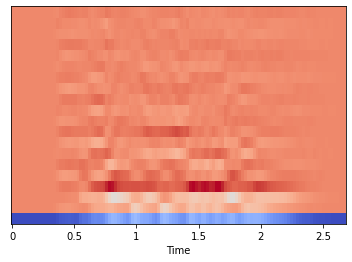

In [98]:
#TODO

########-------------------------------------------------------------------------------------------------
###### Feature extraction by extracting MFCCs features----------------------------------------------
#########-----------------------------------------------------------------------------------------------
# 

mfccs = librosa.feature.mfcc(bird_data, sr=bird_sr)
librosa.display.specshow(mfccs, x_axis='time')
mfccs.shape

# Bonus

## Music genre classification using ANN

This part is a bonus task, so first make sure you have finished the above tasks.  

For the fianl part, let's use a dataset consist of 1000 audio tracks (each 30 s long). The dataset contain the tracks in 10 different genres, and the dataset is balanced. The tracks are all 22050 Hz monophonic 16-bit audio files in .wav format. Download the dataset from [here](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

<details>
    <summary>💡 <strong>hint!</strong></summary>
you may try to convert the audios into png files (the trick is to use spectrogram). Then it would be easier to extract the features (those you have already calculated in the previous section, bandwith, MFCC, and ...). 
</details>

After preprocessing and feature extraction, use a ANN model to calssify the dataset according to their genre. you can use a simple MLP with input layer of 256 neurons, 2 hidden layers of 128 and 64 neurons, and the output layer. And for the metrics reporting `accuracy` is enough. 

In [63]:
#############################################################################################################################
########################## Bonus qestion is answerred in seperate files: ###################################################
#############please see: main bonus_audio and  models####################################################################
###########################################################################################################################
